C:\Users\siljn\AppData\Local\Temp\ipykernel_5232\3423331369.py:199: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.5)


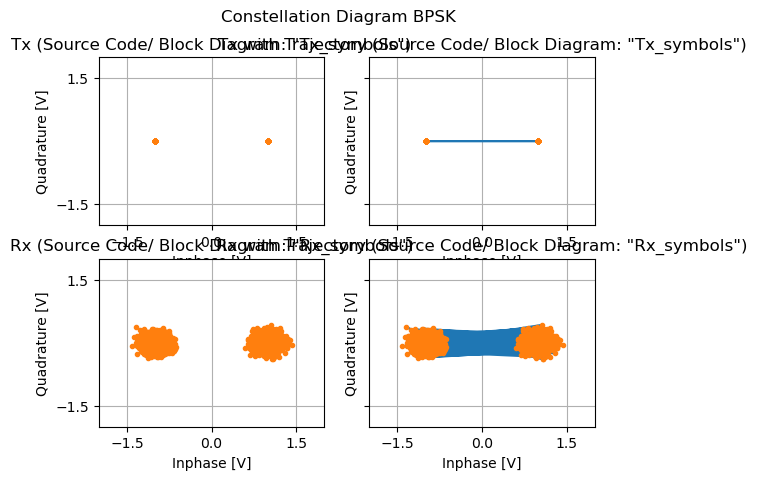

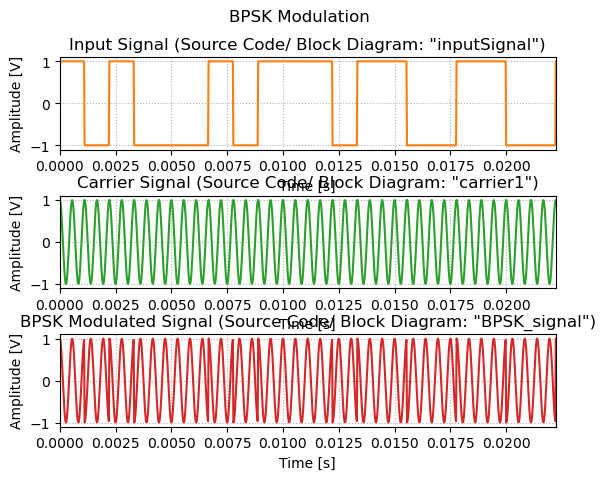

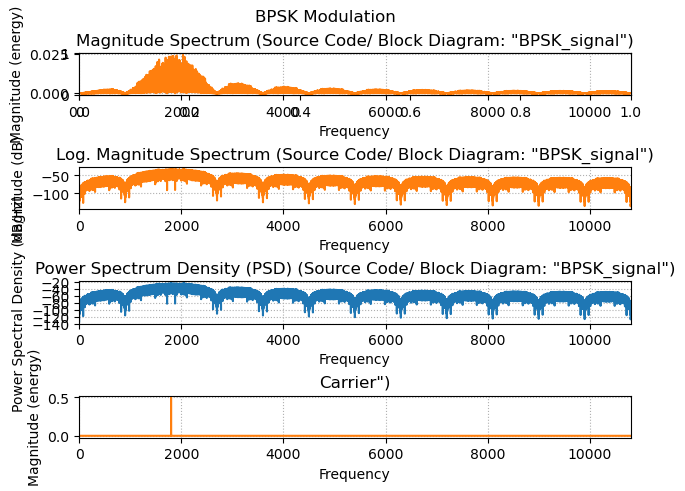

In [2]:
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy as scy
import threading,time
import multiprocessing
import sys
import bitarray
import cmath

from scipy.fftpack import fft
from numpy import pi
from numpy import sqrt
from numpy import sin
from numpy import cos
from numpy import zeros
from numpy import r_
from  scipy.io.wavfile import read as wavread

# Used for symbol creation. Returns a decimal number from a 1 bit input
def GetBpskSymbol(bit1:bool):
    if(~bit1):
        return 0
    elif(bit1):
        return 1
    else:
        return -1

    # Maps a given symbol to a complex signal. Optionally, noise and phase offset can be added.
def BpskSymbolMapper(symbols:int,amplitude,noise1=0, noise2=0,  phaseOffset = 0):
    if(symbols == 0):
        return amplitude*(cos(np.deg2rad(0) + phaseOffset)) + (noise1 + 1j*noise2)
    elif(symbols == 1):
        return amplitude*(cos(np.deg2rad(180) + phaseOffset)) + (noise1 + 1j*noise2)
    else:
        return complex(0)

#-------------------------------------#
#---------- Configuration ------------#
#-------------------------------------#
fs = 44100                  # sampling rate
baud = 900                  # symbol rate
Nbits = 4000                # number of bits
f0 = 1800                   # carrier Frequency
Ns = int(fs/baud)           # number of Samples per Symbol
N = Nbits * Ns              # Total Number of Samples
t = r_[0.0:N]/fs            # time points
f = r_[0:N/2.0]/N*fs        # Frequency Points

# Limit for representation of time domain signals for better visibility. 
symbolsToShow = 20
timeDomainVisibleLimit = np.minimum(Nbits/baud,symbolsToShow/baud)     

# Limit for representation of frequency domain signals for better visibility. 
sideLobesToShow = 9
sideLobeWidthSpectrum = baud                                       
lowerLimit = np.maximum(0,f0-sideLobeWidthSpectrum*(1 + sideLobesToShow))
upperLimit = f0 + sideLobeWidthSpectrum*(1 + sideLobesToShow)

carrier1 = cos(2*pi*f0*t)

#----------------------------#
#---------- BPSK ------------#
#----------------------------#

# Modulator Input
inputBits = np.random.randn(Nbits,1) > 0

#Digital-to-Analog Conversion
inputSignal = (np.tile(inputBits*2-1,(1,Ns))).ravel()
dataSymbols = np.array([[GetBpskSymbol(inputBits[x])] for x in range(0,inputBits.size)])

#Multiplicator / mixxer
BPSK_signal = inputSignal*( carrier1)# + intermodulation1+ intermodulation2)

#---------- Preperation BPSK Constellation Diagram ------------#

amplitude = 1

#Generate noise. Two sources for uncorelated noise.
noiseStandardDeviation = 0.12
noise1 = np.random.normal(0,noiseStandardDeviation,dataSymbols.size) 
noise2 = np.random.normal(0,noiseStandardDeviation,dataSymbols.size) 

#Transmitted and received symbols. Rx symbols are generated under the presence of noise
Tx_symbols = np.array([[BpskSymbolMapper(dataSymbols[x],
                                         amplitude,
                                         phaseOffset = np.deg2rad(0)
                                         )] for x in range(0,dataSymbols.size)])
Rx_symbols = np.array([[BpskSymbolMapper(dataSymbols[x],
                                         amplitude,
                                        noise1 = noise1[x],
                                        noise2 = noise2[x],
                                        phaseOffset = np.deg2rad(0)
                                        )] for x in range(0,dataSymbols.size)])

#---------- Plot of BPSK Constellation Diagram ------------#
fig, axis= plt.subplots(2,2,sharey='row')
fig.suptitle('Constellation Diagram BPSK', fontsize=12)

axis[0,0].plot(Tx_symbols.real, Tx_symbols.imag,'.', color='C1')
axis[0,0].set_title('Tx (Source Code/ Block Diagram: "Tx_symbols")')
axis[0,0].set_xlabel('Inphase [V]')
axis[0,0].set_ylabel('Quadrature [V]')
axis[0,0].set_xlim(-2,2)
axis[0,0].set_xticks([-1.5,0,1.5])
axis[0,0].set_yticks([-1.5,1.5])
axis[0,0].set_ylim(-2,2)
axis[0,0].grid(True)

axis[0,1].plot(Tx_symbols.real, Tx_symbols.imag,'-',Tx_symbols.real, Tx_symbols.imag,'.')
axis[0,1].set_title('Tx with Trajectory (Source Code/ Block Diagram: "Tx_symbols")')
axis[0,1].set_xlabel('Inphase [V]')
axis[0,1].set_ylabel('Quadrature [V]')
axis[0,1].set_xlim(-2,2)
axis[0,1].set_xticks([-1.5,0,1.5])
axis[0,1].set_yticks([-1.5,1.5])
axis[0,1].set_ylim(-2,2)
axis[0,1].grid(True)

axis[1,0].plot(Rx_symbols.real, Rx_symbols.imag,'.', color='C1')
axis[1,0].set_title('Rx (Source Code/ Block Diagram: "Rx_symbols")')
axis[1,0].set_xlabel('Inphase [V]')
axis[1,0].set_ylabel('Quadrature [V]')
axis[1,0].set_xlim(-2,2)
axis[1,0].set_xticks([-1.5,0,1.5])
axis[1,0].set_yticks([-1.5,1.5])
axis[1,0].set_ylim(-2,2)
axis[1,0].grid(True)

axis[1,1].plot(Rx_symbols.real, Rx_symbols.imag,'-',Rx_symbols.real, Rx_symbols.imag,'.')
axis[1,1].set_title('Rx with Trajectory (Source Code/ Block Diagram: "Rx_symbols")')
axis[1,1].set_xlabel('Inphase [V]')
axis[1,1].set_ylabel('Quadrature [V]')
axis[1,1].set_xlim(-2,2)
axis[1,1].set_xticks([-1.5,0,1.5])
axis[1,1].set_yticks([-1.5,1.5])
axis[1,1].set_ylim(-2,2)
axis[1,1].grid(True)

#---------- Plot of BPSK ------------#
fig, axis = plt.subplots(3, 1)
fig.suptitle('BPSK Modulation', fontsize=12)

axis[0].plot(t, inputSignal, color='C1')
axis[0].set_title('Input Signal (Source Code/ Block Diagram: "inputSignal")')
axis[0].set_xlabel('Time [s]')
axis[0].set_xlim(0,timeDomainVisibleLimit)
axis[0].set_ylabel('Amplitude [V]')
axis[0].grid(linestyle='dotted')

axis[1].plot(t, carrier1, color='C2')
axis[1].set_title('Carrier Signal (Source Code/ Block Diagram: "carrier1")')
axis[1].set_xlabel('Time [s]')
axis[1].set_xlim(0,timeDomainVisibleLimit)
axis[1].set_ylabel('Amplitude [V]')
axis[1].grid(linestyle='dotted')

axis[2].plot(t,BPSK_signal, color='C3')
axis[2].set_title('BPSK Modulated Signal (Source Code/ Block Diagram: "BPSK_signal")')
axis[2].set_xlabel('Time [s]')
axis[2].set_xlim(0,timeDomainVisibleLimit)
axis[2].set_ylabel('Amplitude [V]')
axis[2].grid(linestyle='dotted')

plt.subplots_adjust(hspace=0.5)

#---------- Plot of Modulated Signal and Spectrum ------------#
fig = plt.figure(constrained_layout=True)
gs = gridspec.GridSpec(4, 1, figure=fig)
fig.suptitle('BPSK Modulation', fontsize=12)
ax = fig.add_subplot(gs[0, :])
 
ax1 = fig.add_subplot(gs[0])
ax1.set_title('Magnitude Spectrum (Source Code/ Block Diagram: "BPSK_signal")');
ax1.magnitude_spectrum(BPSK_signal, Fs=fs, color='C1')
ax1.set_xlim(lowerLimit,upperLimit)
ax1.grid(linestyle='dotted')

ax2 = fig.add_subplot(gs[1])
ax2.set_title('Log. Magnitude Spectrum (Source Code/ Block Diagram: "BPSK_signal")')
ax2.magnitude_spectrum(BPSK_signal, Fs=fs, scale='dB', color='C1')
ax2.set_xlim(lowerLimit,upperLimit)
ax2.grid(linestyle='dotted')

ax3 = fig.add_subplot(gs[2])
ax3.set_title('Power Spectrum Density (PSD) (Source Code/ Block Diagram: "BPSK_signal")')
ax3.psd(BPSK_signal,NFFT=len(t),Fs=fs)
ax3.set_xlim(lowerLimit,upperLimit)
ax3.grid(linestyle='dotted')

ax4 = fig.add_subplot(gs[3])
ax4.set_title('Carrier")');
ax4.magnitude_spectrum(carrier1, Fs=fs, color='C1')
ax4.set_xlim(lowerLimit,upperLimit)
ax4.grid(linestyle='dotted')

plt.subplots_adjust(hspace=0.5)
plt.show()  

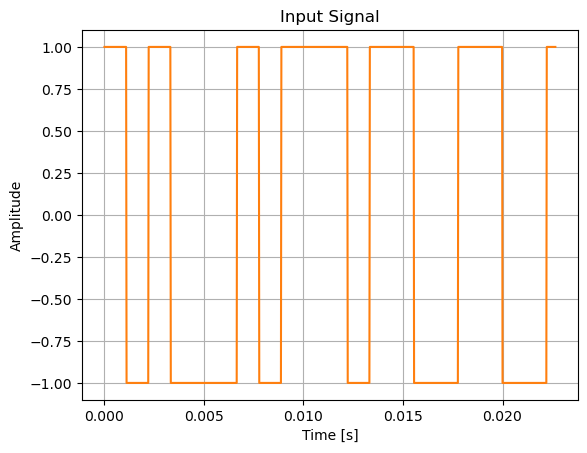

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Assume inputBits and Ns are defined somewhere
inputSignal = (np.tile(inputBits * 2 - 1, (1, Ns))).ravel()

# Define time array
t = np.linspace(0, len(inputSignal) / fs, len(inputSignal))

# Plot input signal
plt.plot(t[:1000], inputSignal[:1000], color='C1')
plt.title('Input Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
